In [1]:
from pylatex import Document, Section, Subsection,Subsubsection
from pylatex import Tabular, Table, MultiColumn
from pylatex.utils import NoEscape, bold
from pylatex.package import Package
from tkinter.filedialog import askopenfilename
import shutil
import re

In [2]:
def copy_image(url):
    archivo_seleccionado = askopenfilename()
    shutil.copy(archivo_seleccionado, 'out/' + url)

In [38]:
def set_variables(var_dict,text):
    var = {}
    for key in var_dict.keys():
        value = var_dict[key][0]
        unit = var_dict[key][1]
        var[key] = str(value.to(unit).magnitude)
    return replace_with_dict(text, var)

In [4]:
def replace_with_dict(text, replacements):
    pattern = re.compile("|".join(map(re.escape, replacements.keys())))
    return pattern.sub(lambda match: replacements[match.group(0)], text)

In [5]:
geometry_options = { "left": "2.5cm", "top": "1.5cm" }
doc = Document(geometry_options=geometry_options)
doc.packages.append(Package('xcolor', options=['dvipsnames']))
doc.packages.append(Package('graphicx'))
doc.packages.append(Package('xargs'))
doc.packages.append(Package('subfigure'))
doc.packages.append(Package('array'))
doc.packages.append(Package('multicol'))
doc.packages.append(Package('multirow'))
doc.packages.append(Package('fp'))
doc.packages.append(Package('xcolor'))
doc.packages.append(Package('booktabs'))
doc.packages.append(Package('amsmath'))

17

In [6]:
# archivo = open('ecuaciones.tex','r',encoding='utf-8')
# ecuaciones = archivo.read()
# archivo.close()
# doc.append(NoEscape(ecuaciones))

In [6]:
from memoria import ecuaciones, introduccion
doc.append(NoEscape(ecuaciones))
doc.append(NoEscape(introduccion))

In [7]:
from memoria import ecuaciones

In [9]:
#copy_image('dimensiones.png')

In [8]:
from memoria import presiones, req_min
doc.append(NoEscape(presiones))
doc.append(NoEscape(req_min))

In [9]:
#Uso de variables
import pint
ureg = pint.UnitRegistry()
m = ureg('m')
cm = ureg('cm')
kgf = ureg('kgf')
ureg.define('tonf=1000*kgf')
tonf = ureg('tonf')

In [10]:
sec = Section('Diseño de la Cimentación')
subsec = Subsection('Diseño de Zapata Aislada')

In [28]:
#Dimensiones de la columna:
b_col = 60*cm
h_col = 90*cm
'''
.
.
.
'''

'\n.\n.\n.\n'

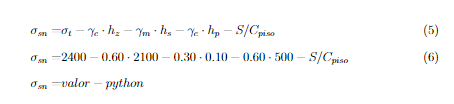

In [29]:
#Capacidad Portante del terreno
σt = 1.2*kgf/cm**2
hz = 10*cm
γc = 2400*kgf/m**3
γm = 1400*kgf/m**3
hs = 100*cm
hp = 40*cm
SCpiso = 100*kgf/m**2
σsn = σt - γc*hz - γm*hs - γc*hp - SCpiso
σsn

0.93 <Unit('force_kilogram / centimeter ** 2')>

In [35]:
variables = {
    'var_sigma_t':(σt,'kgf/cm**2'),
    'var_gamma_c':(γc,'kgf/m**3'),
    'var_hz':(hz,'m'),
    'var_gamma_m':(γm,'kgf/m**3'),
    'var_hs':(hs,'m'),
    'var_hp':(hp,'m'),
    'var_SC':(SCpiso,'kgf/m**2'),
    'var_sigmas':(σsn,'kgf/cm**2')
}

In [36]:
text = r'''\subsubsection{Capacidad portante neta del terreno}

        El concepto de capacidad portante neta que es la capacidad del terreno reducida por efecto de la sobrecarga, el peso del suelo y el peso de la zapata. La capacidad portante neta es igual a:
        \begin{align}
            \sigma_{sn} =&\qn \\
            \sigma_{sn} =&\qn[var_sigma_t][var_gamma_c][var_hz][var_gamma_m][var_hs][var_hp][var_SC]\\
            \sigma_{sn} =& var_sigmas%
        \end{align}

        \textbf{Donde:}

        \begin{table}[h!]
            \centering
            \begin{tabular}{lll}
                $\sigma_{sn}$ &=&    Capacidad portante neta.\\
                $\sigma_t$ &=&   Carga admisible del terreno.\\
                $\gamma_c$ &=&    Peso específico del concreto\\
                $h_s$ &=&   Altura del suelo sobre la zapata.\\
            \end{tabular}
        \end{table}
        '''

In [39]:
cap_portante = set_variables(variables,text)

In [42]:
doc.append(NoEscape(cap_portante))
doc.generate_tex()

In [ ]:
def factor_suelo(zona,suelo,obj=Subsubsection):
    obj = obj('Factor de suelo')
    obj.packages.append(Package('array'))
    obj.packages.append(Package('colortbl'))
    obj.packages.append(Package('graphicx'))
    obj.packages.append(Package('caption'))
    obj.packages.append(Package('slashbox'))
    
    suelo_ind = {'S0':1,'S1':2,'S2':3,'S3':4}
    data = [['4','0.80','1.00','1.05','1.10'],
            ['3','0.80','1.00','1.15','1.20'],
            ['2','0.80','1.00','1.20','1.40'],
            ['1','0.80','1.00','1.60','2.00']]
    data[4-zona][suelo_ind[suelo]] = r'\textcolor[rgb]{ 1,  0,  0}{\textbf{'+data[4-zona][suelo_ind[suelo]] +r'}}'
    data[4-zona] = [i+r'\cellcolor[rgb]{ .949,  .949,  .949} ' for i in data[4-zona]]
    data = [[j+r'\cellcolor[rgb]{ .949,  .949,  .949} ' if i ==suelo_ind[suelo] else j for i,j in enumerate(row)]  for row in data]
    
    obj.append(NoEscape(r'Este factor se interpreta como  un factor de modificación de la aceleración pico del suelo para un perfil determinado respecto al pefil tipo S1'))
    
    with obj.create(Table(position='ht!')) as tab:
        tab.append(NoEscape(r'\centering'))
        tab.append(NoEscape(r'\caption{Factor de suelo}'))
        with obj.create(Tabular(r'|>{\centering\arraybackslash}m{3.75cm}|>{\centering\arraybackslash}m{2cm}|>{\centering\arraybackslash}m{2cm}|>{\centering\arraybackslash}m{2cm}|>{\centering\arraybackslash}m{2cm}|')) as table:
            table.add_hline()
            table.add_row((MultiColumn(5, align='|c|', data=bold('FACTOR DE SUELO SEGÚN E-030')),))
            table.add_hline() 
            table.add_row(NoEscape(r'\backslashbox{\textit{\textbf{ZONA}}}{\textit{\textbf{SUELO}}}'),bold('S0'),bold('S1'),bold('S2'),bold('S3'))
            table.add_hline()
            for row in data:
                table.add_row([NoEscape(i) for i in row])
                table.add_hline()
        tab.append(NoEscape(r'\caption*{Fuente: E-030 (2018)}'))
    return obj

In [ ]:
sec.append(subsec)
doc.append(sec)
#doc.append(NoEscape(var))
doc.append(NoEscape(c_portante))
doc.append(factor_suelo(1,'S0'))
#doc.generate_pdf('out/mem_zapata')
doc.generate_tex('out/mem_zapata')

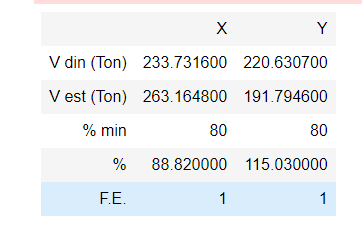

In [ ]:
import pandas as pd
tabla_corte = pd.DataFrame([['','X','Y'],
                           ['V din',233.214,220.22123],
                           ['V din',233.214,220.22123],
                           ['V din',233.214,220.22123],
                           ['V din',233.214,220.22123]])

In [ ]:
def fuerza_cortante_min(tabla_corte_min,o_type=Subsection):
    obj = o_type('Fuerza cortante mínima Art. 29.4 E-030')
    obj.packages.append(Package('tcolorbox'))
    obj.packages.append(Package('array'))
    obj.packages.append(Package('booktabs'))
      

#     with obj.create(Figure(position='ht!')) as fig:
#         fig.append(NoEscape('\\includegraphics[width=0.8\\textwidth]{images/cortantes}'))
#         fig.add_caption('Cortantes de Entrepiso del Análisis Modal Espectral')
#         fig.append(NoEscape(r'\label{fig:corte_basal}'))

    def latex_table(table):
        table.columns = table.iloc[0]
        table=table[1:]
        for i in  ['X','Y']:
            table.loc[:,i] = table.loc[:,i].astype(float)
        table = table.style.hide(axis='index')
        table = table.format('{:.2f}',subset=pd.IndexSlice[:,['X','Y']])
        table = table.to_latex(hrules=True, column_format = 'c'*3).replace('%','\%')
        return table
    obj.append(NoEscape('%insertion'))
    
    with obj.create(Table(position='H')) as table:
        table.append(NoEscape('\centering'))
        table.append(NoEscape('\caption{Escalamiento de la cortante dinámica}'))
        table.append(NoEscape(latex_table(tabla_corte_min)))

    return obj

In [ ]:
fuerza_cortante_min(tabla_corte)

In [ ]:
import handcalcs.render


In [ ]:
%%render
a = 5
b = 3
c = 8

In [ ]:
from math import sin, cos,pi

In [ ]:
%%render long 2
x = a**2+sin(30)+b

In [ ]:
%%tex long 5
phi = 5
x = a**2+sin(30)+cos(pi)*phi

\[
\begin{aligned}
\phi &= 5 \; 
\\[10pt]
x &= \left( a \right) ^{ 2 } + \sin \left( 30 \right) + \cos \left( \pi \right) \cdot \phi \\&= \left( 5 \right) ^{ 2 } + \sin \left( 30 \right) + \cos \left( 3.14159 \right) \cdot 5 \\&= 19.01197  \\[10pt]
\end{aligned}
\]